In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
titanic_data=sns.load_dataset("titanic")
titanic_data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic_data.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object

In [5]:
alive_count = titanic_data.groupby('alive')['alive'].count()
alive_count

alive
no     549
yes    342
Name: alive, dtype: int64

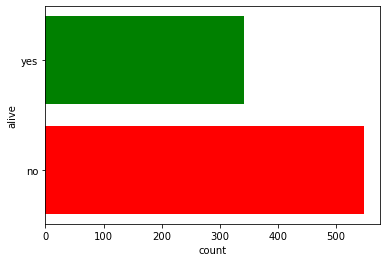

In [6]:
plt.barh(alive_count.index, alive_count.values, color = ('red','green'))
plt.xlabel('count')
plt.ylabel('alive')
plt.show()

In [7]:
who_count = titanic_data.groupby('who')['survived'].count()
who_count

who
child     83
man      537
woman    271
Name: survived, dtype: int64

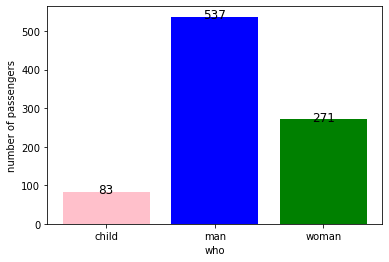

In [8]:
plt.bar(who_count.index, who_count.values, color = ('pink','blue','green'))
plt.xlabel('who')
plt.ylabel('number of passengers')
for count, x in zip(who_count.values, range(3)):
    plt.text(x, count+5, str(int(count)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [9]:
who_sum = titanic_data.groupby('who')['survived'].sum()
who_sum

who
child     49
man       88
woman    205
Name: survived, dtype: int64

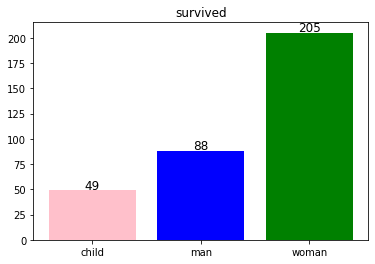

In [10]:
plt.bar(who_sum.index,who_sum.values,color = ('pink','blue','green'))
plt.title('survived')
for count, x in zip(who_sum.values, range(3)):
    plt.text(x, count+5, str(int(count)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()

In [11]:
sex_sum = titanic_data.groupby('sex')['survived'].sum()
sex_sum

sex
female    233
male      109
Name: survived, dtype: int64

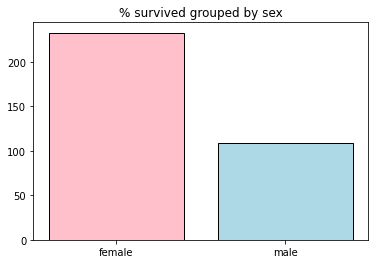

In [12]:
plt.bar(sex_sum.index, sex_sum.values, color = ('pink','lightblue'),ec='k')
plt.title('% survived grouped by sex')
plt.show()

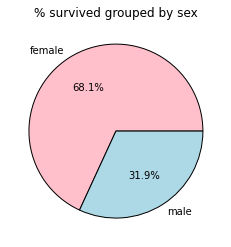

In [13]:
plt.pie(sex_sum.values, labels=['female', 'male'],autopct='%1.1f%%', colors = ('pink','lightblue'),
        wedgeprops={'edgecolor':'black'})
plt.title('% survived grouped by sex')
plt.show()

In [14]:
class_sum = titanic_data.groupby('class')['survived'].sum()
class_sum

class
First     136
Second     87
Third     119
Name: survived, dtype: int64

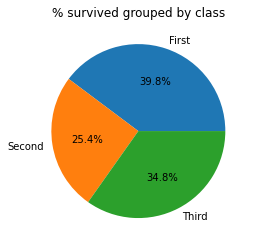

In [21]:
plt.pie(class_sum.values, labels=['First', 'Second', 'Third'],autopct='%1.1f%%')
plt.title('% survived grouped by class')
plt.show()

[62, 102, 220, 167, 89, 48, 19, 6, 1, 0]


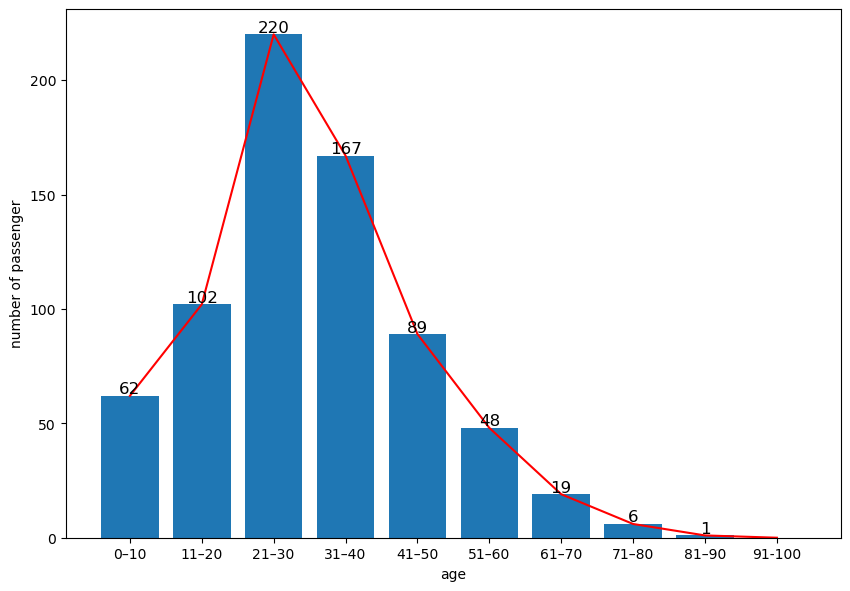

In [17]:
ages = titanic_data[titanic_data['age'].notnull()]['age'].values
step=10
age_arry=[]
while step<=100:
    counter=0
    for age in ages:
        if age>=step-10 and age<step:
            counter+=1
    age_arry.append(counter)
    step+=10
print(age_arry)

ages_labels = ['0–10', '11–20', '21–30', '31–40', '41–50', '51–60', '61–70', '71–80', '81–90','91-100']
plt.figure(figsize=(10,7),dpi=100)
plt.bar(ages_labels, age_arry)
plt.plot(ages_labels, age_arry,color='red')
plt.xlabel('age')
plt.ylabel('number of passenger')
for count, x in zip(age_arry, range(9)):
    plt.text(x, count+3, str(int(count)), fontsize=12,
             horizontalalignment='center', verticalalignment='center')
plt.show()